In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [184]:
td = pd.read_csv('titanic.csv')

In [186]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
td.shape

(891, 12)

In [190]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
# check the number of missing values in each column
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# handling Missing Values

In [195]:
# drop the "Cabin" column from the dataframe
td = td.drop(columns='Cabin', axis=1)

In [197]:
# replacing the missing values in "Age" column with mean value
td['Age'].fillna(td['Age'].mean(), inplace=True)

C:\Users\arvind\AppData\Local\Temp\ipykernel_8072\1353005501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  td['Age'].fillna(td['Age'].mean(), inplace=True)


In [199]:
# finding the mode value of "Embarked" column
print(td['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [201]:
print(td['Embarked'].mode()[0])

S


In [203]:
# replacing the missing values in "Embarked" column with mode value
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True)

C:\Users\arvind\AppData\Local\Temp\ipykernel_8072\2894001406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True)


In [205]:
# check the number of missing values in each column
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [208]:
# getting some statistical measures about the data
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
# finding the number of people survived and not survived
td['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data Visualization

In [213]:
sns.set()

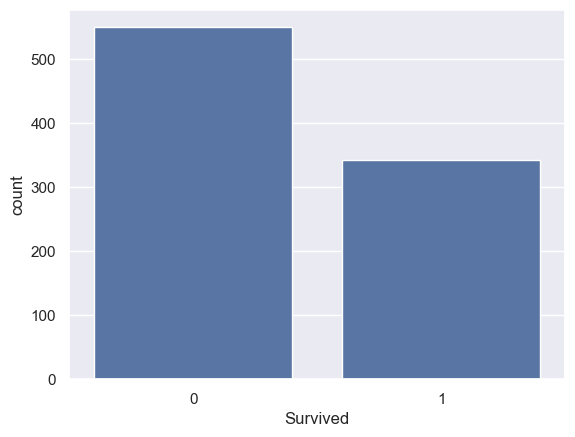

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=td)
plt.show()


In [217]:
td['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

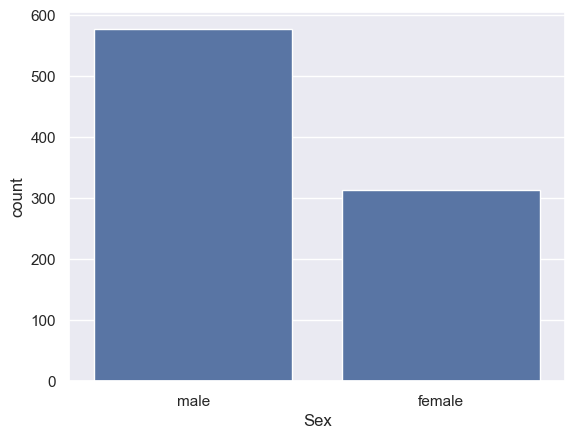

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=td)
plt.show()


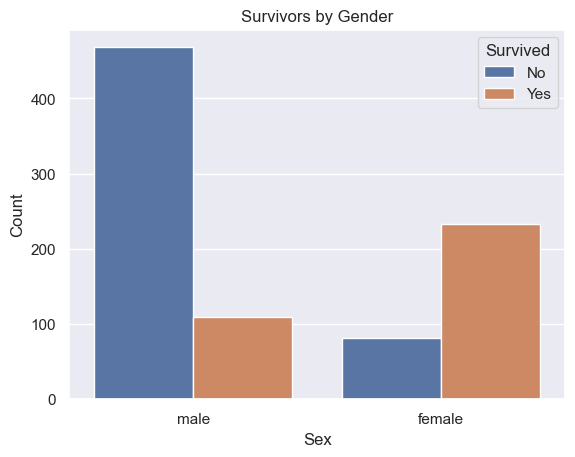

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=td)
plt.title("Survivors by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


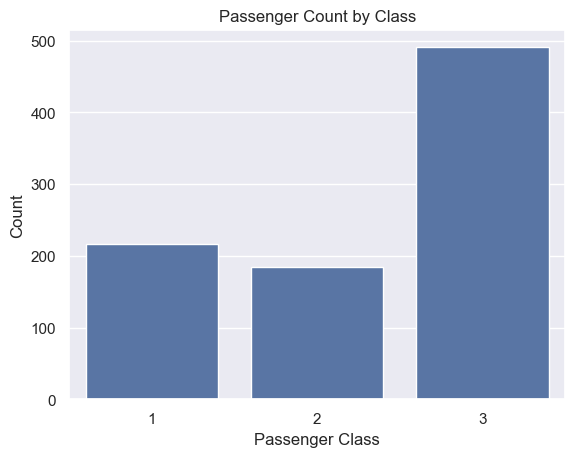

In [222]:
# making a count plot for "Pclass" column
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', data=td)
plt.title("Passenger Count by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


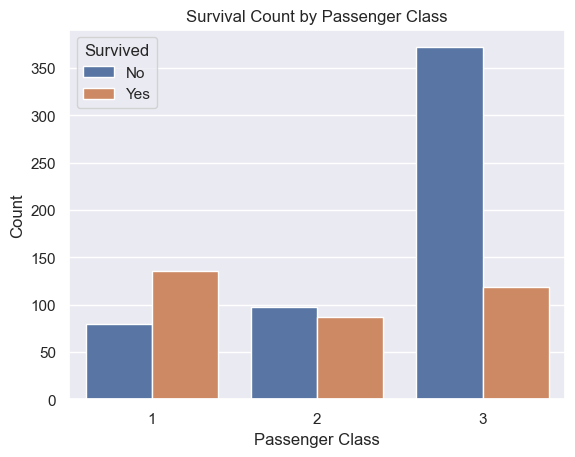

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=td)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [227]:
td['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [229]:
td['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [231]:
# converting categorical Columns

td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\arvind\AppData\Local\Temp\ipykernel_8072\1788197606.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [233]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Separating features & Target

In [236]:
X = td.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = td['Survived']

In [238]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [240]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting the data into training data & Test data

In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [245]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training

## Logistic Regression && Decision Tree Classifier

In [249]:
# Initialize models
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [251]:
# Train models
log_model.fit(X_train, Y_train)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# Model Evaluation

In [263]:
# Predict
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

## Accuracy Score

In [266]:
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(Y_test, tree_preds))

Logistic Regression Accuracy: 0.7821229050279329
Decision Tree Accuracy: 0.7988826815642458


In [268]:
print("\nClassification Report (Logistic Regression):\n", classification_report(Y_test, log_preds))
print("\nClassification Report (Decision Tree):\n", classification_report(Y_test, tree_preds))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.85      0.66      0.74        79

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.79       179

